In [16]:
import pandas as pd
import folium
from folium.plugins import HeatMap, MeasureControl
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dataa = r"C:\Program Files\GitHub\KSP\crime_data111.csv"

In [18]:
data = pd.read_csv(dataa)

In [19]:
# Filter out rows with missing latitude or longitude values
filtered_data = data.dropna(subset=['Latitude', 'Longitude'])

In [20]:
bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

In [7]:
# grid_lines = folium.FeatureGroup(name='Gridlines', overlay=True, control=False)


In [21]:
# Iterate over the rows in the data
for _, row in data.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    # Check if latitude and longitude are not NaN
    if not pd.isna(latitude) and not pd.isna(longitude):
        # Add a CircleMarker for each valid coordinate
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=3,
            fill=True,
            fill_color='red',
            color='red',
            fill_opacity=0.6,
            popup=f"Crime: {row['Crime']},Latitude: {latitude}, Longitude: {longitude}"
        ).add_to(bangalore_map)

In [9]:
# def on_map_click(event):
#     lat, lon = event['latlng']
#     # Find the closest hotspot to the clicked location
#     closest_hotspot = data.iloc[(data['Latitude']-lat).pow(2).add((data['Longitude']-lon).pow(2)).idxmin()]
#     # Display crime information as popup
#     popup_content = f"Crime: {closest_hotspot['Crime']}<br>Latitude: {closest_hotspot['Latitude']}<br>Longitude: {closest_hotspot['Longitude']}"
#     popup = folium.Popup(popup_content, max_width=300)
#     folium.Marker([lat, lon], popup=popup).add_to(bangalore_map)



In [22]:
# Create a list of lists containing latitude and longitude pairs for HeatMap
heat_data = [[row['Latitude'], row['Longitude']] for _, row in filtered_data.iterrows()]

# Remove NaN values from the heat data
heat_data = [[lat, lon] for lat, lon in heat_data if not (pd.isna(lat) or pd.isna(lon))]

# Add HeatMap layer to the map
HeatMap(heat_data).add_to(bangalore_map)

# Calculate bounding box of data
min_lat, max_lat = min(data['Latitude']), max(data['Latitude'])
min_lon, max_lon = min(data['Longitude']), max(data['Longitude'])

# # Calculate grid spacing based on data range
# lat_range = max_lat - min_lat
# lon_range = max_lon - min_lon
# grid_spacing = min(lat_range, lon_range) / 20  # Adjust the denominator for gridline density

# # Add the gridlines
# for lat in np.arange(min_lat, max_lat, grid_spacing):
#     folium.PolyLine([(lat, min_lon), (lat, max_lon)], color='black', weight=1).add_to(bangalore_map)

# for lon in np.arange(min_lon, max_lon, grid_spacing):
#     folium.PolyLine([(min_lat, lon), (max_lat, lon)], color='black', weight=1).add_to(bangalore_map)

# # Add extra lines to fully close the grid
# folium.PolyLine([(min_lat, min_lon), (max_lat, min_lon)], color='black', weight=1).add_to(bangalore_map)
# folium.PolyLine([(max_lat, min_lon), (max_lat, max_lon)], color='black', weight=1).add_to(bangalore_map)
# folium.PolyLine([(max_lat, max_lon), (min_lat, max_lon)], color='black', weight=1).add_to(bangalore_map)
# folium.PolyLine([(min_lat, max_lon), (min_lat, min_lon)], color='black', weight=1).add_to(bangalore_map)

# # Add MeasureControl to show gridlines and adjust scale based on zoom level
# measure_control = MeasureControl(primary_length_unit='centimeters')
# bangalore_map.add_child(measure_control)

# # Add click event to allow user to select a grid
# folium.ClickForMarker(popup="Click to proceed").add_to(bangalore_map)


In [23]:
bangalore_map

In [12]:
bangalore_map.save("bangalore_map.html")

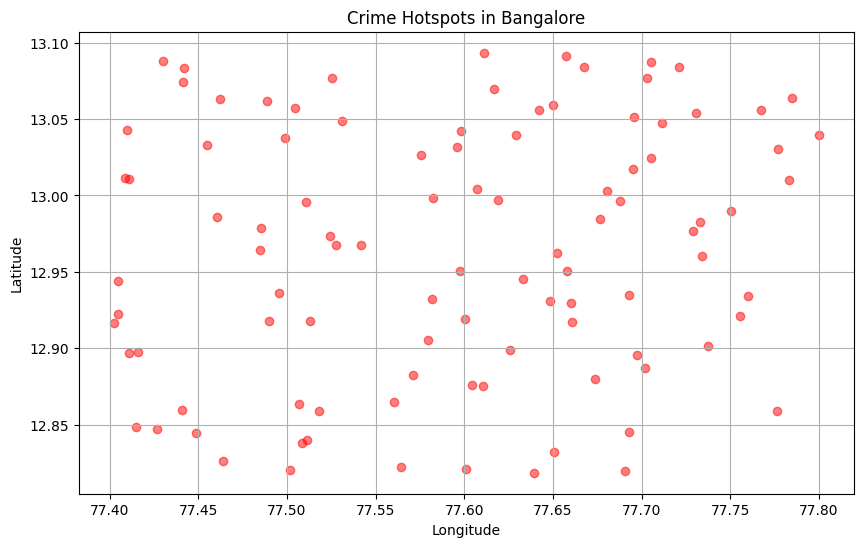

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c='red', marker='o', alpha=0.5)
plt.title('Crime Hotspots in Bangalore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.savefig('graph.png')
plt.show()

In [25]:
import pandas as pd
import folium
from folium.plugins import HeatMap, MeasureControl
import numpy as np

# Read the crime data from CSV file
data = pd.read_csv("C:\\Program Files\\GitHub\\KSP\\crime_data111.csv")

# Filter the data for a specific crime (e.g., "Theft")
crime_name = "Theft"
crime_data = data[data['Crime'] == crime_name]

# Filter out rows with missing latitude or longitude values
filtered_data = crime_data.dropna(subset=['Latitude', 'Longitude'])

# Create a Folium map centered around Bangalore
bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# # Create a feature group for gridlines
# grid_lines = folium.FeatureGroup(name='Gridlines', overlay=True, control=False)

# Iterate over the rows in the data
for _, row in crime_data.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    # Check if latitude and longitude are not NaN
    if not pd.isna(latitude) and not pd.isna(longitude):
        # Add a CircleMarker for each valid coordinate
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=3,
            fill=True,
            fill_color='red',
            color='red',
            fill_opacity=0.6,
            popup=f"Crime: {row['Crime']}, Latitude: {latitude}, Longitude: {longitude}"
        ).add_to(bangalore_map)

# Create a list of lists containing latitude and longitude pairs for HeatMap
heat_data = [[row['Latitude'], row['Longitude']] for _, row in filtered_data.iterrows()]

# Remove NaN values from the heat data
heat_data = [[lat, lon] for lat, lon in heat_data if not (pd.isna(lat) or pd.isna(lon))]

# Add HeatMap layer to the map
HeatMap(heat_data).add_to(bangalore_map)

# Calculate bounding box of data
min_lat, max_lat = min(crime_data['Latitude']), max(crime_data['Latitude'])
min_lon, max_lon = min(crime_data['Longitude']), max(crime_data['Longitude'])

# # Calculate grid spacing based on data range
# lat_range = max_lat - min_lat
# lon_range = max_lon - min_lon
# grid_spacing = min(lat_range, lon_range) / 20  # Adjust the denominator for gridline density

# # Add the gridlines
# for lat in np.arange(min_lat, max_lat, grid_spacing):
#     folium.PolyLine([(lat, min_lon), (lat, max_lon)], color='black', weight=1).add_to(bangalore_map)

# for lon in np.arange(min_lon, max_lon, grid_spacing):
#     folium.PolyLine([(min_lat, lon), (max_lat, lon)], color='black', weight=1).add_to(bangalore_map)

# # Add extra lines to fully close the grid
# folium.PolyLine([(min_lat, min_lon), (max_lat, min_lon)], color='black', weight=1).add_to(bangalore_map)
# folium.PolyLine([(max_lat, min_lon), (max_lat, max_lon)], color='black', weight=1).add_to(bangalore_map)
# folium.PolyLine([(max_lat, max_lon), (min_lat, max_lon)], color='black', weight=1).add_to(bangalore_map)
# folium.PolyLine([(min_lat, max_lon), (min_lat, min_lon)], color='black', weight=1).add_to(bangalore_map)

# # Add MeasureControl to show gridlines and adjust scale based on zoom level
# measure_control = MeasureControl(primary_length_unit='centimeters')
# bangalore_map.add_child(measure_control)

# # Add click event to allow user to select a grid
# folium.ClickForMarker(popup="Click to proceed").add_to(bangalore_map)

# # Add layer control
# folium.LayerControl().add_to(bangalore_map)

# Display the map
bangalore_map
